#IMPORT LIBRARY DAN LOAD DATA

In [1]:
!wget https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv

--2022-10-30 10:16:51--  https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv
Resolving rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)... 52.219.129.51
Connecting to rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)|52.219.129.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240079969 (229M) [text/csv]
Saving to: ‘loan_data_2007_2014.csv’

loan_data_2007_2014 100%[===================>] 228.96M   101MB/s    in 2.3s    

2022-10-30 10:16:54 (101 MB/s) - ‘loan_data_2007_2014.csv’ saved [240079969/240079969]



In [2]:
import pandas as pd, numpy as  np, seaborn as sns, warnings,matplotlib.pyplot as plt
import re
warnings.filterwarnings("ignore")

In [3]:
backupLoan =  pd.read_csv("loan_data_2007_2014.csv", low_memory=False)
loanData = backupLoan.copy()

In [4]:
loanData.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**LOAN MAPPING GOOD OR BAD LOAN**

In [5]:
loanData.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [6]:
good_loan = ['Fully Paid','Current','In Grace Period','Does not meet the credit policy. Status:Fully Paid']

loanData['mapping_loan_status'] = np.where(loanData['loan_status'].isin(good_loan), 1,0)

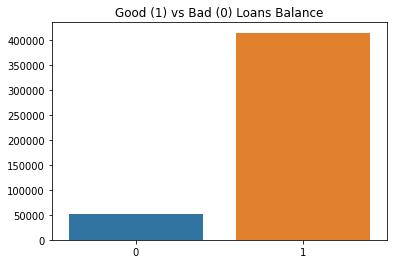

In [7]:
plt.title('Good (1) vs Bad (0) Loans Balance')
sns.barplot(x=loanData.mapping_loan_status.value_counts().index,y=loanData.mapping_loan_status.value_counts().values)

In [8]:
def get_percent(s) : 
  return int(re.search('[0-9]+',s).group()) / 100

def get_dropcol(iterable) : 
  for x in iterable : 
    for y in x : 
      drop_col.append(y)

nan_data = loanData.isnull().mean()
drop_col = [
    'Unnamed: 0',
    'id', 
    'member_id', 
    'url', 
    'title', 
    'desc', 
    'zip_code',
    'emp_title', 
    'sub_grade', 
    'next_pymnt_d', 
    'recoveries', 
    'collection_recovery_fee', 
    'total_rec_prncp' ,
    'total_rec_late_fee',
    'addr_state',
    'application_type',
    'policy_code',
    'issue_d', 
    'loan_status', 
    'pymnt_plan', 
    'out_prncp', 
    'out_prncp_inv', 
    'total_pymnt', 
    'total_pymnt_inv', 
    'total_rec_prncp', 
    'total_rec_int', 
    'total_rec_late_fee', 
    'recoveries', 
    'collection_recovery_fee',  
    'last_pymnt_d',
    'last_pymnt_amnt', 
    'next_pymnt_d'
]


execution_list = [
    nan_data[nan_data > get_percent("50%")].to_dict().keys(), 
    loanData.nunique()[loanData.nunique() < 2].to_dict().keys()
]

get_dropcol(execution_list)

drop_col = list(dict.fromkeys(drop_col))


loanData.drop(columns=drop_col, inplace=True, axis=1)
loanData.dropna(inplace=True)

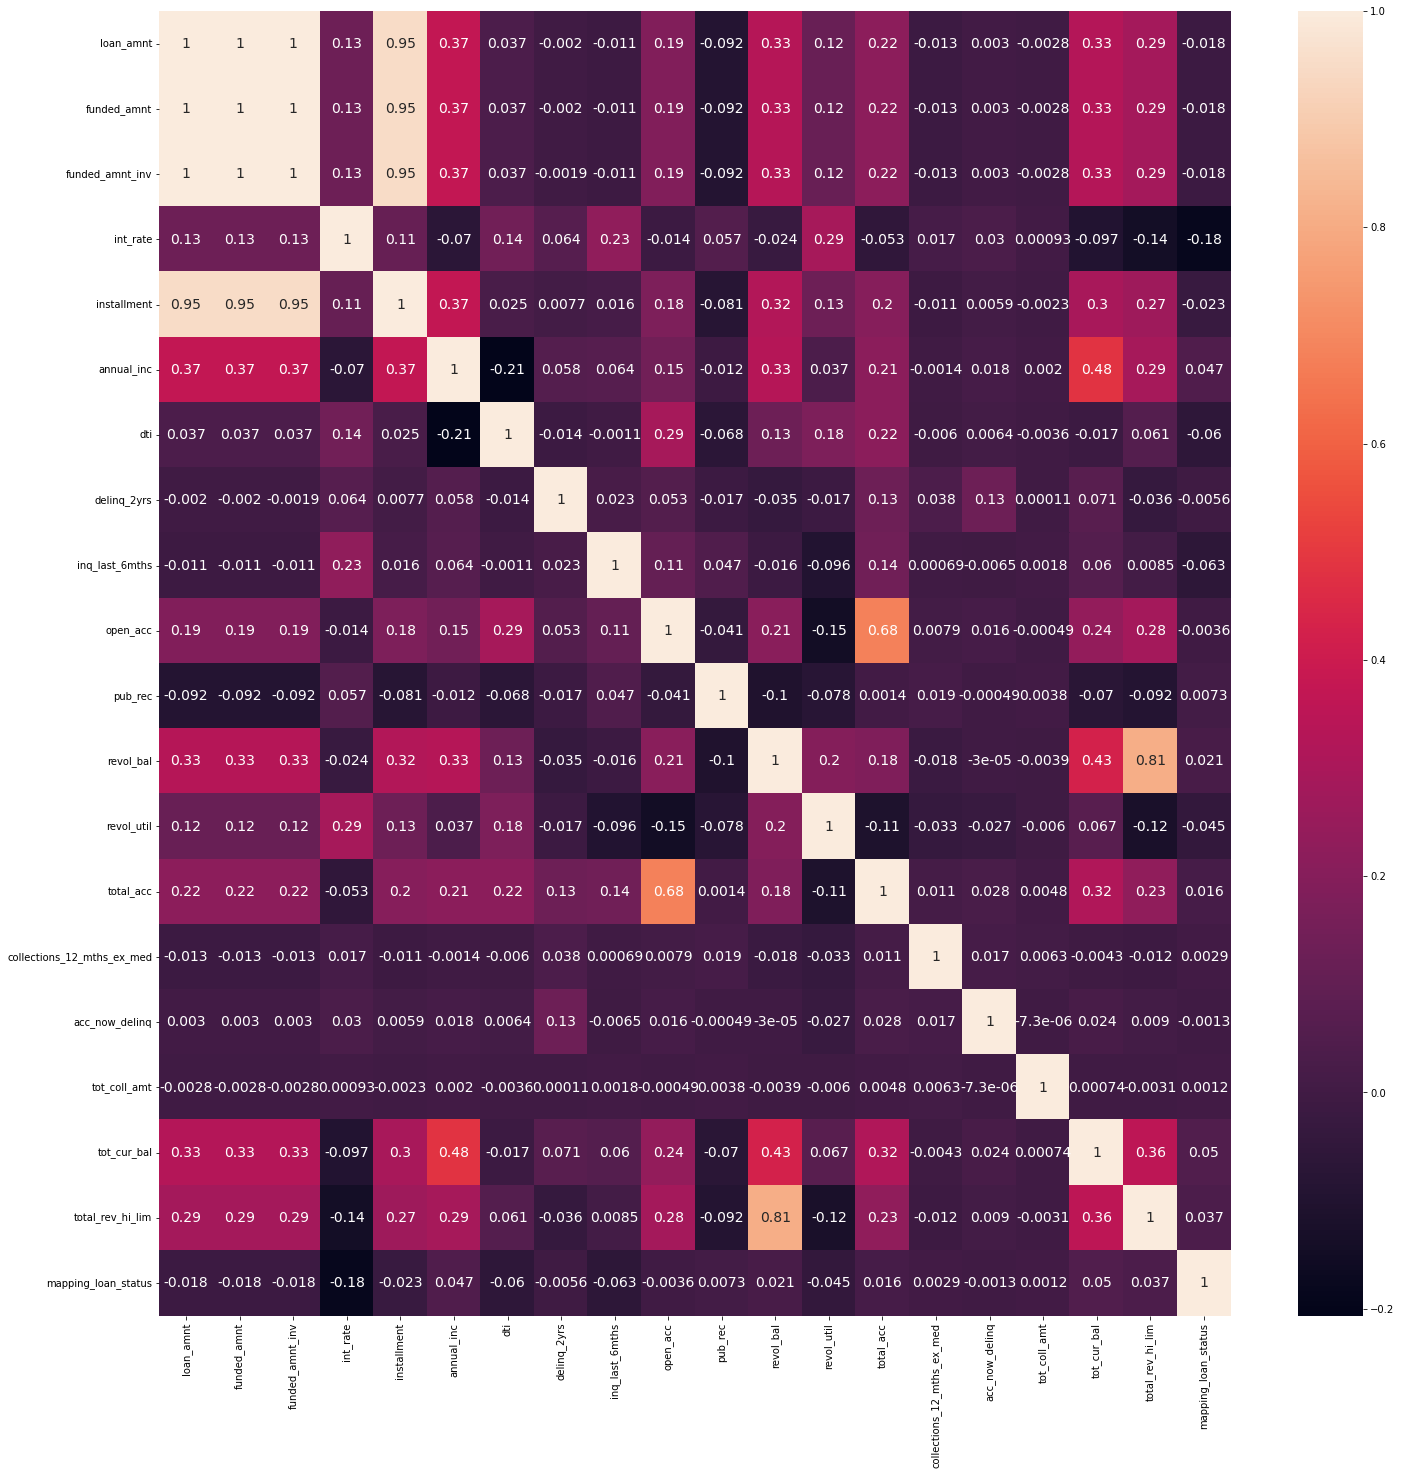

In [9]:
#Periksa Korelasi
plt.figure(figsize=(24,24))
sns.heatmap(loanData.corr(), annot=True, annot_kws={'size':14})

In [10]:
loanData[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()


,loan_amnt,funded_amnt,funded_amnt_inv
count,376815.000000,376815.000000,376815.000000
mean,14888.717474,14888.677136,14882.131789
std,8314.161791,8314.115618,8310.845938
min,1000.000000,1000.000000,950.000000
25%,8500.000000,8500.000000,8500.000000
50%,13200.000000,13200.000000,13200.000000
75%,20000.000000,20000.000000,20000.000000
max,35000.000000,35000.000000,35000.000000


In [11]:
loanData.drop(columns = ['funded_amnt', 'funded_amnt_inv'], inplace = True)


In [12]:
loanData.reset_index(drop= True, inplace = True)

In [13]:
loanData.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'mapping_loan_status'],
      dtype='object')

In [14]:
for x in loanData.select_dtypes(include=['object']).columns : 
  print(x)
  print(loanData[x].unique())
  print()

term
[' 36 months' ' 60 months']

grade
['B' 'C' 'A' 'D' 'E' 'F' 'G']

emp_length
['10+ years' '1 year' '2 years' '4 years' '3 years' '7 years' '5 years'
 '6 years' '9 years' '8 years' '< 1 year']

home_ownership
['OWN' 'RENT' 'MORTGAGE' 'NONE' 'OTHER' 'ANY']

verification_status
['Verified' 'Not Verified' 'Source Verified']

purpose
['debt_consolidation' 'other' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'house' 'moving' 'medical' 'car'
 'vacation' 'renewable_energy' 'wedding']

earliest_cr_line
['Oct-86' 'Jan-07' 'Mar-94' 'Oct-98' 'Mar-98' 'Nov-97' 'Jun-88' 'Oct-10'
 'Oct-89' 'May-91' 'Sep-03' 'Nov-94' 'Jun-89' 'Jun-01' 'Jan-89' 'Jul-91'
 'Mar-99' 'Jul-92' 'Dec-09' 'Aug-95' 'Jun-98' 'Dec-93' 'Jul-01' 'Mar-90'
 'Mar-82' 'Nov-78' 'Dec-01' 'Aug-84' 'Feb-04' 'Aug-94' 'Apr-98' 'Aug-00'
 'May-94' 'Feb-84' 'Sep-89' 'Nov-89' 'Aug-89' 'Dec-98' 'Sep-00' 'May-03'
 'Apr-06' 'Aug-99' 'Jan-85' 'Feb-85' 'Dec-85' 'Feb-94' 'Nov-98' 'Jun-93'
 'Oct-88' 'Nov-95' 'Aug-87' 'Jan-91

In [15]:
#sebelum konversi dari data kategorik ke numerik
loanData['emp_length'].unique()

array(['10+ years', '1 year', '2 years', '4 years', '3 years', '7 years',
       '5 years', '6 years', '9 years', '8 years', '< 1 year'],
      dtype=object)

In [16]:
cond_tobe_applied = (loanData['emp_length'].astype(str) != 'nan') & (loanData['emp_length'].astype(str) != '< 1 year')

new_result = {
    'true' : loanData['emp_length'].str.replace(r'[^0-9]+',' ',regex=True),
    'false' : '0'
}

loanData['emp_length'] = np.where( cond_tobe_applied ,new_result['true'],new_result['false']).astype('int') 

In [17]:
#setelah konversi dari data kategorik ke numerik
loanData['emp_length'].unique()

array([10,  1,  2,  4,  3,  7,  5,  6,  9,  8,  0])

In [18]:
loanData['term'].unique()


array([' 36 months', ' 60 months'], dtype=object)

In [19]:
loanData['term'] = loanData['term'].str.replace(r'[^0-9]+','',regex=True).astype('int').map(lambda a : int(a / 12))


In [20]:
loanData['term'].unique()


array([3, 5])

In [21]:
loanData['earliest_cr_line'].unique()

array(['Oct-86', 'Jan-07', 'Mar-94', 'Oct-98', 'Mar-98', 'Nov-97',
       'Jun-88', 'Oct-10', 'Oct-89', 'May-91', 'Sep-03', 'Nov-94',
       'Jun-89', 'Jun-01', 'Jan-89', 'Jul-91', 'Mar-99', 'Jul-92',
       'Dec-09', 'Aug-95', 'Jun-98', 'Dec-93', 'Jul-01', 'Mar-90',
       'Mar-82', 'Nov-78', 'Dec-01', 'Aug-84', 'Feb-04', 'Aug-94',
       'Apr-98', 'Aug-00', 'May-94', 'Feb-84', 'Sep-89', 'Nov-89',
       'Aug-89', 'Dec-98', 'Sep-00', 'May-03', 'Apr-06', 'Aug-99',
       'Jan-85', 'Feb-85', 'Dec-85', 'Feb-94', 'Nov-98', 'Jun-93',
       'Oct-88', 'Nov-95', 'Aug-87', 'Jan-91', 'Apr-04', 'Oct-02',
       'May-01', 'Aug-91', 'Apr-95', 'Jan-99', 'Jul-89', 'Nov-96',
       'Dec-99', 'Jun-96', 'Aug-02', 'Jun-92', 'Aug-05', 'Jan-98',
       'Mar-96', 'Oct-00', 'Mar-02', 'Jan-94', 'Dec-04', 'Oct-97',
       'Sep-04', 'Dec-90', 'Nov-99', 'Feb-93', 'Nov-10', 'Nov-01',
       'Feb-05', 'Feb-99', 'Jun-04', 'Apr-08', 'Nov-00', 'Aug-08',
       'Oct-95', 'Jun-03', 'Nov-83', 'Aug-01', 'Nov-91', 'Sep-

In [22]:
def to_date(df, column) : 
  today_date = pd.to_datetime(pd.to_datetime('today').strftime("%Y-%m-%d"))
  loanData[column] = pd.to_datetime(df[column], format = "%b-%y")

  df['mnths_since-' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
  df['mnths_since-' + column] = df['mnths_since-' + column].apply(lambda x: df['mnths_since-' + column].max() if x < 0 else x)
  df.drop(columns = [column], inplace = True)

In [23]:
pattern = '(?:(?:Jan|Feb)(?:uary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)'
date_col = [x for x in loanData.select_dtypes(include=['object']).columns if loanData[x].str.contains(pattern).sum()]
for col in date_col : 
  to_date(loanData,col)



In [24]:
loanData.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
purpose                           0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
collections_12_mths_ex_med        0
acc_now_delinq                    0
tot_coll_amt                      0
tot_cur_bal                       0
total_rev_hi_lim                  0
mapping_loan_status               0
mnths_since-earliest_cr_line      0
mnths_since-last_credit_pull_d    0
dtype: int64

In [25]:
loanData.isnull().sum()[loanData.isnull().sum() > 0]

Series([], dtype: int64)



```
# This is formatted as code
```

DATA EXPLORATORY

In [26]:
def risk_percentage(x):
    ratio = (loanData.groupby(x)['mapping_loan_status'] # group by
         .value_counts(normalize=True) # calculate the ratio
         .mul(100) # multiply by 100 to be percent
         .rename('risky (%)') # rename column as percent
         .reset_index())
    sns.lineplot(data=ratio[ratio['mapping_loan_status'] == 0], x=x, y='risky (%)')
    plt.title(x)
    plt.show()


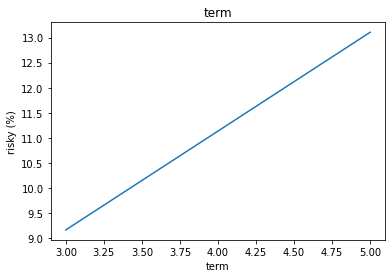

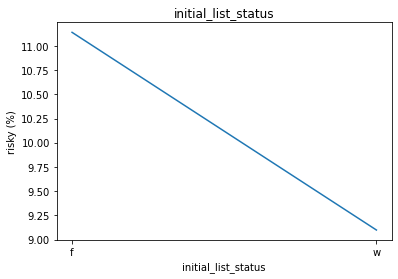

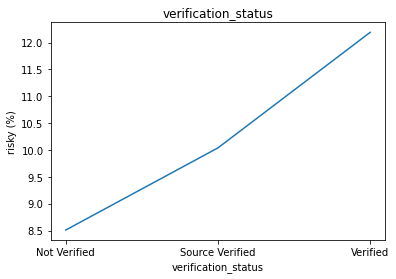

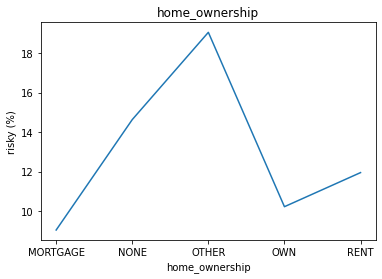

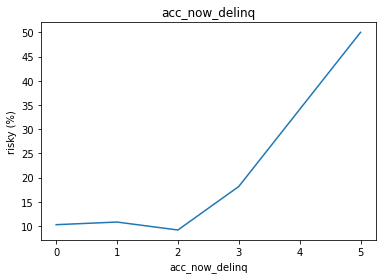

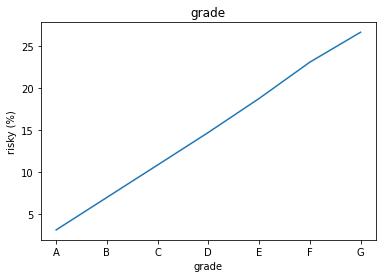

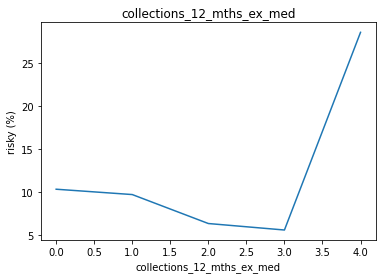

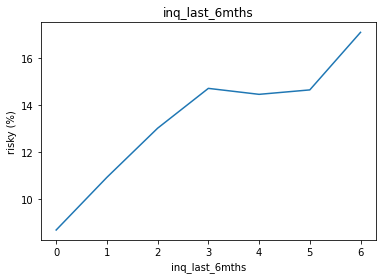

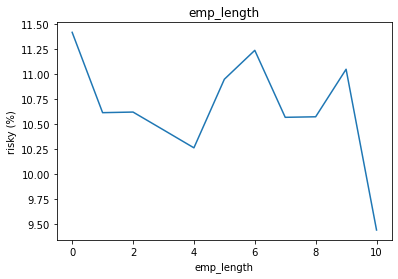

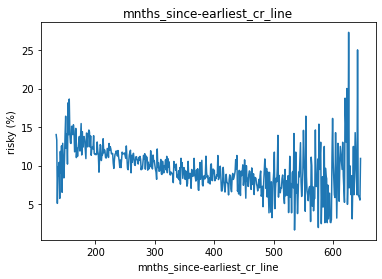

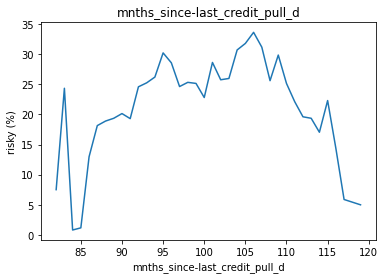

In [27]:
unique_cols = [ x for x in loanData.nunique()[loanData.nunique() < 12].sort_values().index if x != 'mapping_loan_status'] + ['mnths_since-earliest_cr_line', 'mnths_since-last_credit_pull_d']
for cols in unique_cols:
    risk_percentage(cols)


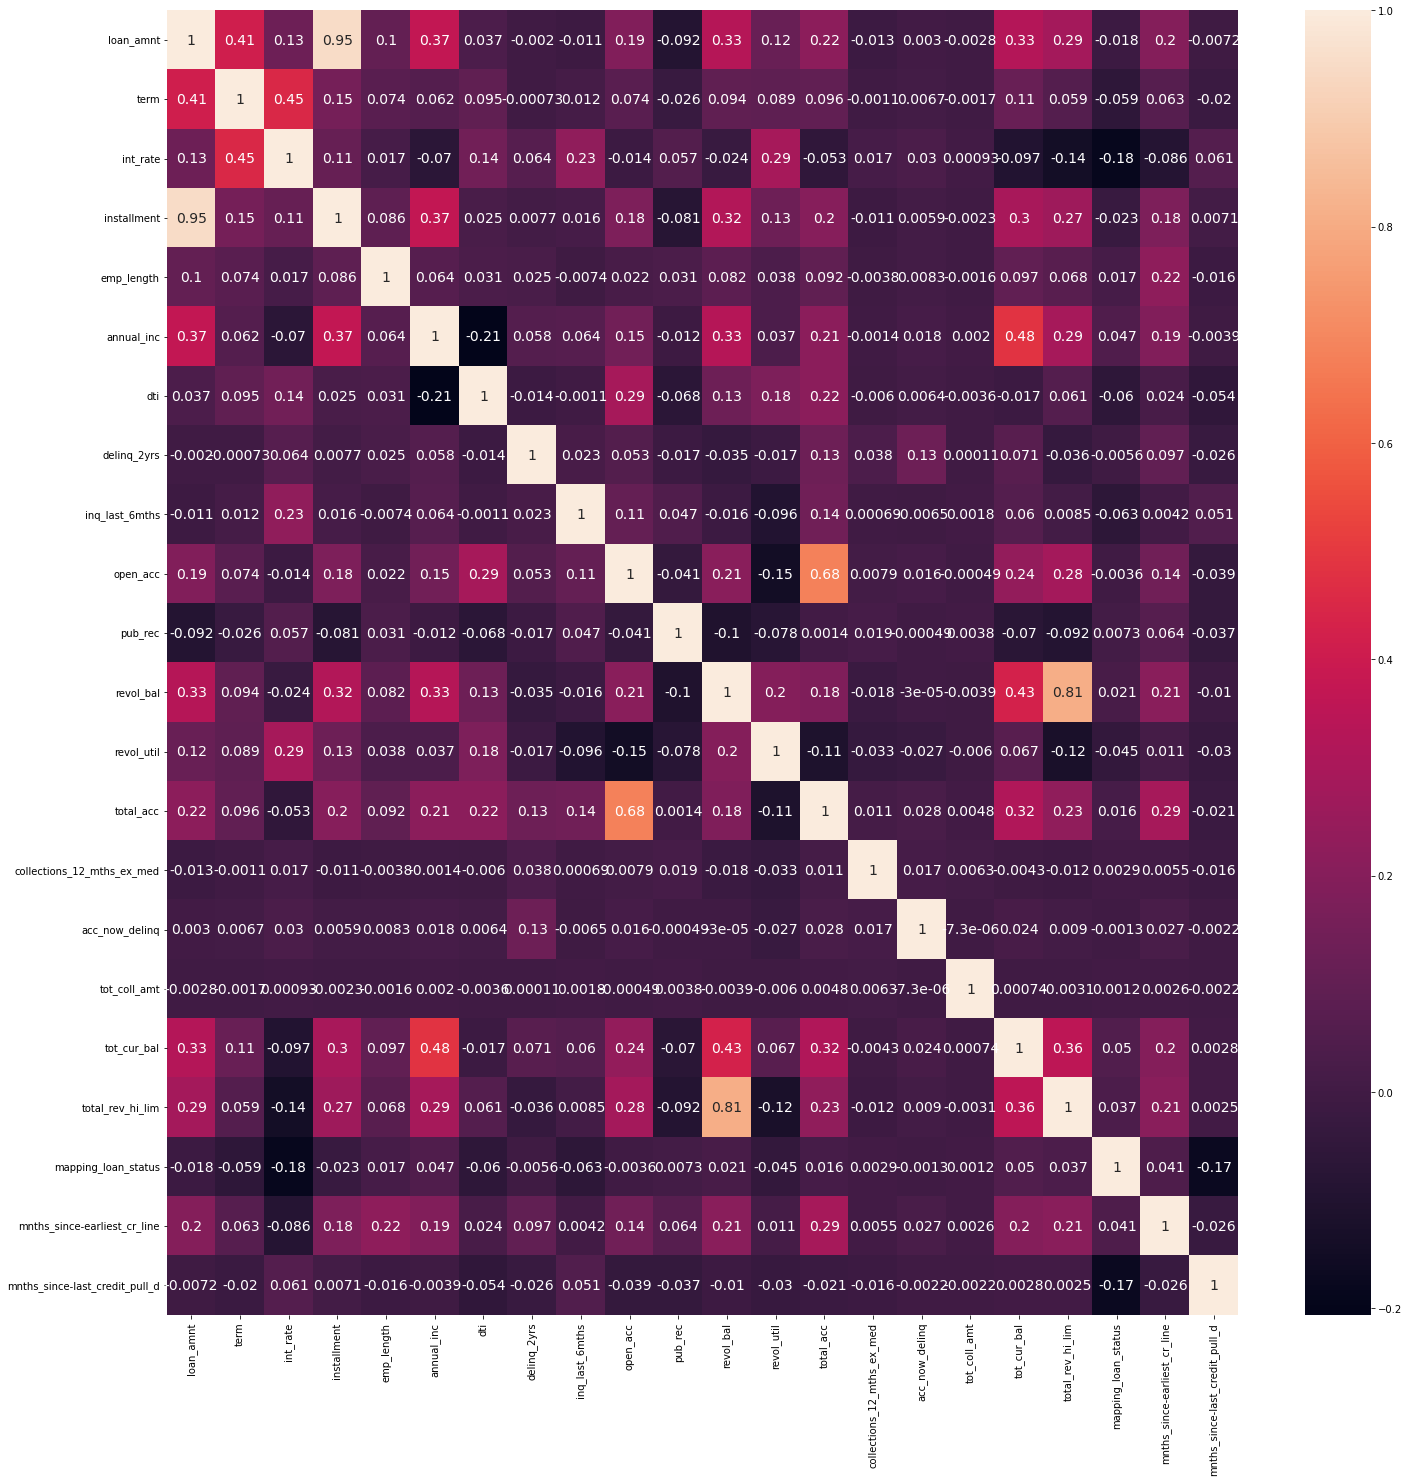

In [28]:
plt.figure(figsize=(24,24))
sns.heatmap(loanData.corr(), annot=True, annot_kws={'size':14})

**One Hot Encoding**

In [29]:
# Konversi kolom kategorik dengan One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
cat_cols = [col for col in loanData.select_dtypes(include='object').columns.tolist()]
onehot_cols = pd.get_dummies(loanData[cat_cols], drop_first=True)

In [30]:
onehot_cols

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376810,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
376811,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376812,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376813,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


**Standardization**

Standarisasi semua kolom numerik dengan menggunakan fungsi StandardScaler yang disediakan oleh sklearn

In [31]:
from sklearn.preprocessing import StandardScaler

num_cols = [col for col in loanData.columns.tolist() if col not in cat_cols + ['mapping_loan_status']]
ss = StandardScaler()
std_cols = pd.DataFrame(ss.fit_transform(loanData[num_cols]), columns=num_cols)

In [32]:
std_cols

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mnths_since-earliest_cr_line,mnths_since-last_credit_pull_d
0,1.462721,-0.636407,-0.696051,1.787984,1.067670,-0.366558,0.662066,-0.370897,-0.748833,0.494049,...,0.942299,0.182879,0.121162,-0.090421,-0.063345,-0.012609,-0.171244,0.778408,1.598664,-0.212501
1,-0.618069,-0.636407,-0.014132,-0.475142,-1.420119,-0.891324,0.948696,-0.370897,-0.748833,0.097082,...,-0.414041,-0.183281,0.207454,-0.090421,-0.063345,-0.012609,-0.828190,-0.410430,-1.278350,-0.404164
2,-0.347446,-0.636407,-1.692702,-0.330460,1.067670,0.538211,-0.461526,-0.370897,0.215404,0.097082,...,-0.167997,-1.543306,-0.310297,-0.090421,-0.063345,-0.012609,0.825561,0.810252,0.544943,-0.404164
3,-0.347446,-0.636407,-0.116762,-0.170863,1.067670,-0.637988,-0.093365,-0.370897,-0.748833,-0.895334,...,-0.527341,0.514167,0.552621,-0.090421,-0.063345,1.013729,-0.831569,-0.596187,-0.106233,-0.404164
4,0.013385,-0.636407,-1.172710,0.111455,-1.143698,-0.221795,-0.148144,-0.370897,-0.748833,-0.696851,...,-0.250169,0.749556,0.293746,-0.090421,-0.063345,0.088384,0.857172,-0.402469,-0.023356,-0.404164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376810,0.422326,1.571321,0.097621,-0.067442,-0.590856,0.628688,0.277344,-0.370897,1.179641,1.287981,...,0.306966,0.897764,0.897789,-0.090421,-0.063345,-0.012609,1.003981,-0.017689,-0.745570,-0.404164
376811,0.855323,1.571321,1.351987,0.546608,1.067670,0.049636,0.098996,-0.370897,4.072352,1.287981,...,0.071850,-0.466620,0.380038,-0.090421,-0.063345,-0.012609,0.526700,0.234408,0.083200,-0.404164
376812,0.698963,1.571321,0.672349,0.267323,0.238407,-0.529416,1.016214,-0.370897,1.179641,1.287981,...,-0.474546,-0.257385,1.501832,-0.090421,-0.063345,-0.012609,-0.440230,-0.463504,-0.556137,-0.212501
376813,-1.550215,-0.636407,-1.400777,-1.583719,-0.867277,0.140113,-1.564736,3.212127,0.215404,1.883431,...,-0.251446,-1.547665,0.121162,-0.090421,-0.063345,-0.012609,2.938805,0.597960,-0.721891,1.320808


**Get Final Data**

In [33]:
final_data = pd.concat([onehot_cols, std_cols, loanData[['mapping_loan_status']]], axis=1)
final_data.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mnths_since-earliest_cr_line,mnths_since-last_credit_pull_d,mapping_loan_status
0,1,0,0,0,0,0,0,0,0,1,...,0.182879,0.121162,-0.090421,-0.063345,-0.012609,-0.171244,0.778408,1.598664,-0.212501,1
1,0,1,0,0,0,0,0,0,0,0,...,-0.183281,0.207454,-0.090421,-0.063345,-0.012609,-0.828190,-0.410430,-1.278350,-0.404164,1
2,0,0,0,0,0,0,1,0,0,0,...,-1.543306,-0.310297,-0.090421,-0.063345,-0.012609,0.825561,0.810252,0.544943,-0.404164,1
3,1,0,0,0,0,0,0,0,0,0,...,0.514167,0.552621,-0.090421,-0.063345,1.013729,-0.831569,-0.596187,-0.106233,-0.404164,1
4,0,0,0,0,0,0,1,0,0,0,...,0.749556,0.293746,-0.090421,-0.063345,0.088384,0.857172,-0.402469,-0.023356,-0.404164,1


**Model Training and Prediction**


**Data Splitting**

Membuat data train dan data test dengan menggunakan data splitting dengan ketentuan rasio 70/30

In [34]:
X = final_data.drop('mapping_loan_status', axis = 1)
y = final_data['mapping_loan_status']

In [35]:
#spliting data menjadi data train dan juga data test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42,stratify=y)

In [36]:
X_train.shape, X_test.shape


((263770, 47), (113045, 47))

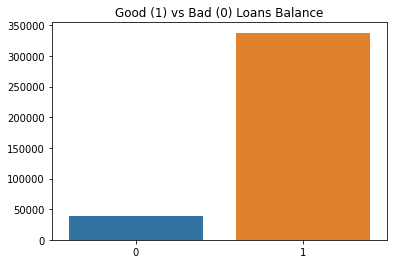

In [37]:
#memeriksa jika label kelas-kelas tidak terdapat imbalance

plt.title('Good (1) vs Bad (0) Loans Balance')
sns.barplot(x = final_data.mapping_loan_status.value_counts().index, y = final_data.mapping_loan_status.value_counts().values)

In [38]:
#memeriksa  imbalance untuk data train
y_train.value_counts()

1    236609
0     27161
Name: mapping_loan_status, dtype: int64

Berdasarkan Ilustrasi *Chart* dan Data diatas, data yang terklasifikasi sebagai **status pinjaman buruk** memiliki tingkat perbandingan yang jauh lebih sedikit jumlahnya dengan **status pinjaman baik** oleh karena nya data set ini dapat di nyatakan sebagai data yang *imbalance*

Melatih model tanpa menangani distribusi kelas *imbalance* menggunakan regresi logistik

In [39]:
# Import Library
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve

In [40]:
# training
LR= LogisticRegression(max_iter=600).fit(X_train, y_train)
# predicting
y_pred_LR = LR.predict(X_test)

# classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_LR, digits=2, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan       0.42      0.02      0.04     11640
   good loan       0.90      1.00      0.95    101405

    accuracy                           0.90    113045
   macro avg       0.66      0.51      0.49    113045
weighted avg       0.85      0.90      0.85    113045



hasil prediksi memiliki hasil yang sangat tidak sama antara kelas=kelas *bad loan* dan *good loan* . dimana untuk kelas *bad loan*, hasil terhadap nilai recall sangat dekat dengan batas nilai kosong / 0. sementara pada kelas *good loan* , hasil terhadap nilai recall mecapai nilai sempurna / 100. Untuk mendapatkan nilai Recall dengan cara angka prediksi bernilai **POSITIF** benar (True Positive) dibagi dengan jumlah angka **POSITIF**. yang berarti model dengan benar mengidentifikasi 2 % dari total *bad loans* dan juga dengan benar mengidentifikasi 100% dari total *good loans*.

model ini mendapatkan akurasi yang cukup tinggi hanya dengan memprediksikan the kelas mayoritas, sedangkan model ini gagal untuk mendapatkan hasil nya untuk kelas minoritas,

hal ini terjadi dikarenakan karena dataset yang *imbalance* sehingga model *machine learning* mengabaikan kelas minoritas atau bad loan secara keseluruhan

jadi, kelas yang *imbalance* data dapat mempengaruhi model pada saat pelatihan. ini merupakan suatu kendala karena data bad loan (kelas minoritas) dibutuhkan untuk memprediksi model ini


Teknik **oversampling** kelas minoritas akan digunakan untuk mengatasi *imbalance* data ini.

**Oversampling Minority Class to Resolve Class Imbalance**

*Random oversampling* melibatkan duplikasi secara acak contoh dari kelas minoritas dan menambahkannya ke dataset pelatihan.

In [41]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

#periksa jumlah nilai sebelum dan sesudah dilakukan oversampling
print('Before OverSampling:\n{}'.format(y_train.value_counts()))
print('\nAfter OverSampling:\n{}'.format(y_train_ros.value_counts()))

Before OverSampling:
1    236609
0     27161
Name: mapping_loan_status, dtype: int64

After OverSampling:
1    236609
0    236609
Name: mapping_loan_status, dtype: int64


**Train the model after over sampling**

Setelah melakukan proses **over sampling** data sudah *balance* / seimbang selanjutnya kita sudah siap untuk melakukan pelatihan pada model dengan mengkomparasikan berbagai algoritma klasifikasi yang ada dan mencari rata-rata akurasi terbaik dari performa yang dihasilkan

In [42]:
#import library for training
from sklearn.linear_model import LogisticRegression #algoritma RegresiLogistik
from sklearn.tree import DecisionTreeClassifier #algoritma Klasifikasi DecisionTree
from sklearn.ensemble import RandomForestClassifier #algoritma Klasifikasi RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier #algoritma Klasifikasi KNeighborsClassifier
from xgboost import XGBClassifier  #algoritma Klasifikasi XGB

## 1. Algoritma Logistic Regression

In [43]:
# Training 
LR_CF = LogisticRegression(max_iter=600)  
LR_CF.fit(X_train_ros, y_train_ros)

#predicting
y_pred_LR_CF = LR_CF.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_LR_CF, digits=2, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan       0.18      0.65      0.29     11640
   good loan       0.94      0.67      0.78    101405

    accuracy                           0.66    113045
   macro avg       0.56      0.66      0.53    113045
weighted avg       0.87      0.66      0.73    113045



## 2. Algoritma Klasifikasi Decision Tree

In [46]:
# Training 
DT_CF= DecisionTreeClassifier(max_depth = 5)
DT_CF.fit(X_train_ros, y_train_ros)

#predicting
y_pred_DT_CF = DT_CF.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_DT_CF, digits=2, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan       0.19      0.61      0.29     11640
   good loan       0.94      0.71      0.81    101405

    accuracy                           0.70    113045
   macro avg       0.57      0.66      0.55    113045
weighted avg       0.86      0.70      0.75    113045



## 3. Algoritma Klasifikasi Random Forest

In [48]:
# Training 
RF_CF= RandomForestClassifier(max_depth = 5, n_estimators=16)
RF_CF.fit(X_train_ros, y_train_ros)

#predicting
y_pred_RF_CF = RF_CF.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_RF_CF, digits=2, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan       0.17      0.66      0.27     11640
   good loan       0.94      0.64      0.76    101405

    accuracy                           0.64    113045
   macro avg       0.56      0.65      0.52    113045
weighted avg       0.86      0.64      0.71    113045



## 4. Algoritma Klasifikasi KNeighbors

In [49]:
# Training 
KNN_CF= KNeighborsClassifier(n_neighbors=16)
KNN_CF.fit(X_train_ros, y_train_ros)

#predicting
y_pred_KNN_CF = KNN_CF.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_KNN_CF, digits=2, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan       0.15      0.61      0.24     11640
   good loan       0.93      0.59      0.72    101405

    accuracy                           0.59    113045
   macro avg       0.54      0.60      0.48    113045
weighted avg       0.85      0.59      0.67    113045



## 5. Algoritma Klasifikasi XGB

In [50]:
# Training 
XGB_CF= XGBClassifier(max_depth=4)
XGB_CF.fit(X_train_ros, y_train_ros)

#predicting
y_pred_XGB_CF = XGB_CF.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_XGB_CF, digits=2, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan       0.20      0.67      0.31     11640
   good loan       0.95      0.70      0.80    101405

    accuracy                           0.69    113045
   macro avg       0.57      0.68      0.56    113045
weighted avg       0.87      0.69      0.75    113045



### **KESIMPULAN**

setelah melakukan pelatihan kepada model dengan data yang sudah di **oversampling** , akurasi untuk tiap kelas baik itu *bad loan* ataupun *good loan* didapatkan hasil yang seimbang dan stabil (**rata rata akurasi** untuk tiap kelas **lebih dari (>) 58%**. jadi dapat dikatakan bahwa penggunaan **oversampling** dapat membantu model saat proses pelatihan sehingga bisa mendeteksi kelas-kelas *bad loan* dan *good loan* dengan cukup bagus. 
<br>
<br>
**rata-rata akurasi terbaik** ditempati terhadap semua model yang dihasilkan diatas yaitu dengan menggunakan algoritma klasifikasi *Decision Tree* dimana didapati hasil dengan skor akurasi sebesar **70%** begitu juga nilai recall *bad loan* = **61%** dan nilai recall *good loan* = **71%**. walaupun akurasi yang didapatkan sebesar **70%** yang bisa dibilang kurang begitu tinggi , tapi dengan nilai ini sudah cukup tinggi karena dataset yang *imbalance* kemungkinan yang terjadi sebalik nya bila dataset tidak *imbalance* pasti bisa mencapai akurasi yang lebih tinggi lagi
. oleh karena itu model ini mampu mengidentifikasi 61% dari total *bad loan* dan juga mampu mengidentifikasi 71% dari total *good loan* 